In [6]:
#!pip install pysrim
import os, subprocess, shutil#, inspect, ast

import numpy as np
import matplotlib.pyplot as plt

from importlib import reload 


import simulation_lib; reload(simulation_lib); from simulation_lib import * ; 
import aux_functions; reload(aux_functions); from aux_functions import *

display_post_installation_message()
show_functions = False; show_detailed_info = False
if(show_functions): print_available_functions("simulation_lib", show_help=show_detailed_info)
if(show_functions): print_available_functions("aux_functions", show_help=show_detailed_info)




        REWRITE : 
        
        IMPORTANT: Post-installation Edits Required for PySRIM Compatibility

        After installing PySRIM, please follow these two steps to manually edit the PySRIM code.
        The files are likely located at:
        `anaconda3/lib/python3.11/site-packages/srim/`

        1. **File: `output.py` (SRIMOutput._read_num_ions)**
        - Modify the `_read_num_ions()` method.
        - Replace the following line:
                return int(float(match.group(1)))
        - With:
                return int(float(match.group(1).replace(b',', b'.')))
        - This change ensures proper handling of numbers with commas as decimal separators.

        2. **File: `input.py` (TRIMInput._write_ion)**
        - Modify the `_write_ion()` method.
        - Replace the following line:
                self._trim.ion.energy / 1000
        - With:
                self._trim.ion.energy
        - This ensures that ion energies are input directly in keV, avoiding incompati

# Initialization 

Definition of directory paths and executables. 

Input file (.txt) must contain these informations:
- Isotope, (string size 2) e.g. "Ba" 
- Atomic number (int)
- Energy value in keV
- Number of ions 

The code is configured to also handle: 
- Ion mass (default values read from elements.yalm @ pysrim folder)
- Bragg correction value (recommended : extracted from SRIM - by hand)
- Angle (default value = 0°)
- Isotope Yield (not used in simulation but in analysis)

    -> Autosave number does not behave as expected: ignore.
     
Example of input file format found in folder. 

Attention to > ' ' < while typing new values, respect format for code coherence. 
    
If a new input format is given -> user should update run_simulation() function.


In [7]:
srim_path = '/Users/brigitte/SRIM/'

input_list_path = os.path.join(srim_path,'input_list.txt') 

trim_executable = os.path.join(srim_path, "TRIM.exe")  # Path to TRIM executable

#  FILE FORMAT:
#  ['Ion:', 'Z1', 'M1', 'Energy(keV)', 'Yield', 'Angle', 'Number', 'BraggCorr', 'AutoSaveNumber']
print("input_list_path =", input_list_path)
with open(input_list_path, 'r') as file:
    input_list = file.readlines()


isotope_list = []
yield_list = []
for line in input_list[1:]:
    aux = ast.literal_eval(line)
    # Remove brackets and split by commas, then strip whitespace
    isotope_list.append(aux[0])
    yield_list.append(float(aux[4]))

print_line()

print("Isotope list:\n",isotope_list, " type=",type(isotope_list),"\n")
print("FILE FORMAT:\n",input_list[0],"\n",input_list[2],"\n",input_list[3],"\n...\n",input_list[-1])

print_line()


input_list_path = /Users/brigitte/SRIM/input_list.txt

------------------------------------------

Isotope list:
 ['Br', 'Kr', 'Rb', 'Sr', 'Y', 'Zr', 'Nb', 'Mo', 'Tc', 'Ru', 'Rh', 'Pd', 'Ag', 'Cd', 'Sn', 'Sb', 'Te', 'I', 'Xe', 'Cs', 'Ba', 'La', 'Ce', 'Pr', 'Nd', 'Pm', 'Sm', 'Eu']  type= <class 'list'> 

FILE FORMAT:
 ['Ion:', 'Z1', 'M1', 'Energy(keV)', 'Yield', 'Angle', 'Number', 'BraggCorr', 'AutoSaveNumber']
 
 ['Kr', '36', '83,912', '104600', '1.351E-02', '0', '100', '1.004811', '100']
 
 ['Rb', '37', '84,91', '104600', '2.162E-02', '0', '100', '1.004811', '100']
 
...
 ['Eu', '63', '152,921', '79700', '6.757E-03', '0', '100', '1.004811', '100']


------------------------------------------



## Start simulation

Define gas_density and layer width 

In [8]:
reload(simulation_lib); from simulation_lib import *  
reload(aux_functions); from aux_functions import *

layer_width = 3E8 #angstroms
gas_temperature = 18 # °C
gas_molar_mass = 16.04 # g/mol
gas_pressure = 1.1 # bar

ugas_temperature = 3
ugas_pressure = 0.005

gas_density = calculate_gas_density(Temp=gas_temperature,MMolar=gas_molar_mass,Pressure=gas_pressure) #input here gas info
ugas_density = gas_density * np.sqrt( (ugas_temperature/(gas_temperature+273.15))**2 + (ugas_pressure/gas_pressure)**2 )
gas_density, ugas_density = round_according_uncertainty(gas_density,ugas_density)
print(gas_density, "±", ugas_density)

# start_simulation(srim_path,input_list_path,gas_density, layer_width=layer_width)

0.000729 ± 8e-06


## Start analysis of simulation:

#### Read output files to extract/calculate:
- deposited energy;
- electron cloud center of gravity
- ion average range
- ...

Starting analysis of OUTPUTS/43Tc
Starting analysis of OUTPUTS/61Pm
Starting analysis of OUTPUTS/56Ba
Starting analysis of OUTPUTS/60Nd
Starting analysis of OUTPUTS/41Nb
Starting analysis of OUTPUTS/44Ru
Starting analysis of OUTPUTS/58Ce
Starting analysis of OUTPUTS/37Rb
Starting analysis of OUTPUTS/48Cd
Starting analysis of OUTPUTS/63Eu
Starting analysis of OUTPUTS/62Sm
Starting analysis of OUTPUTS/55Cs
Starting analysis of OUTPUTS/39Y
Starting analysis of OUTPUTS/57La
Starting analysis of OUTPUTS/53I
Starting analysis of OUTPUTS/45Rh
Starting analysis of OUTPUTS/42Mo
Starting analysis of OUTPUTS/50Sn
Starting analysis of OUTPUTS/46Pd
Starting analysis of OUTPUTS/35Br
Starting analysis of OUTPUTS/40Zr
Starting analysis of OUTPUTS/51Sb
Starting analysis of OUTPUTS/47Ag
Starting analysis of OUTPUTS/59Pr
Starting analysis of OUTPUTS/38Sr
Starting analysis of OUTPUTS/54Xe
Starting analysis of OUTPUTS/52Te
Starting analysis of OUTPUTS/36Kr


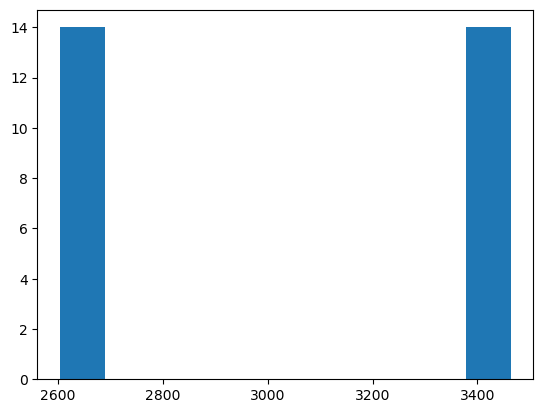

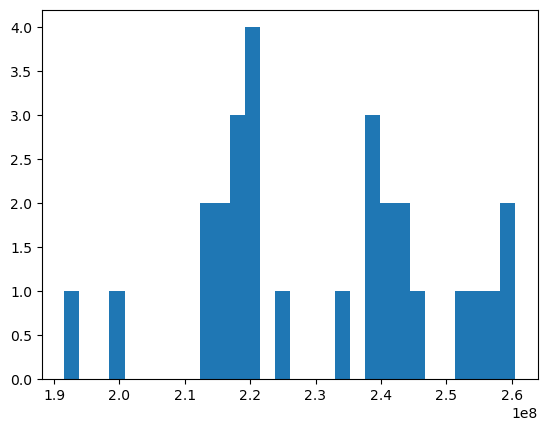

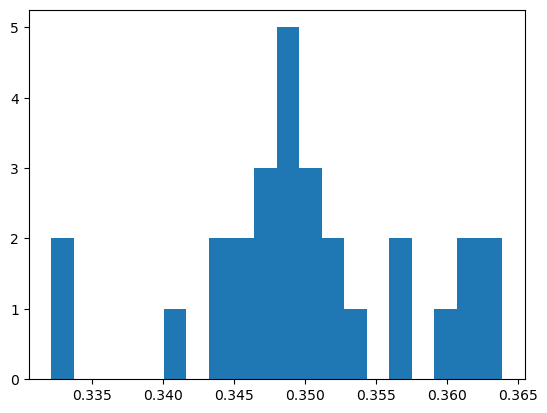

(0.3511472811265224, 0.007877226364568833)

In [9]:
reload(simulation_lib); from simulation_lib import *  
reload(aux_functions); from aux_functions import *

simu_output_directories = "OUTPUTS"

simu_output_subdirectories = subdirectories(simu_output_directories)

rCG, average_range, XRratio = [],[],[]
deposited_energy  = []

for simdir in simu_output_subdirectories:
    outdir = simu_output_directories + "/" + simdir
    print("Starting analysis of", outdir)

    ranges_output = read_range(outdir)
    # print(ranges_output)
    depths, ioniz_by_ions, ioniz_by_recoils = read_ioniz(outdir)
    
    depths=np.array(depths)
    ioniz_by_ions=np.array(ioniz_by_ions)
    ioniz_by_recoils=np.array(ioniz_by_recoils)

    # print(depths)
    # print(ioniz_by_ions)
    # print(depths*ioniz_by_ions)
    '''
    # number of electrons is proportional to deposited energy 
        # Né = E(r)/W
    # the center of gravity of the electron cloud is given by Sum(r * E(r)/ W ) / Sum( E(r) / W ) => Sum( r*E(r) )/ Sum(E(r))
    '''
    deposited_energy.append(sum(ioniz_by_ions+ioniz_by_recoils))
    rCG.append(sum(depths*(ioniz_by_ions+ioniz_by_recoils))/sum(ioniz_by_ions+ioniz_by_recoils))
    # print(ranges_output["Ion Average Range"])
    average_range.append(float(ranges_output["Ion Average Range"]))
    XRratio.append(rCG[-1]/average_range[-1])
    # print("   done")

plt.hist(deposited_energy)
plt.show()
plt.hist(average_range,30)
plt.show()
XRratio = np.array(XRratio)
plt.hist(XRratio, bins=20)
plt.show()

sum(XRratio*yield_list/2), np.std(XRratio)



## Calculate simulation uncertainty 

[0.0007210000000000001, 0.000737]

Starting simulation for isotope   >>> Br <<<   ...
     editing input file ...
Br in CH4 - pure methane


wineserver: using server-side synchronization.
002c:err:winediag:getaddrinfo Failed to resolve your host name IP
007c:fixme:hid:handle_IRP_MN_QUERY_ID Unhandled type 00000005
007c:fixme:hid:handle_IRP_MN_QUERY_ID Unhandled type 00000005
007c:fixme:hid:handle_IRP_MN_QUERY_ID Unhandled type 00000005
007c:fixme:hid:handle_IRP_MN_QUERY_ID Unhandled type 00000005
00c4:err:environ:init_peb starting L"Z:\\Users\\brigitte\\SRIM\\TRIM.exe" in experimental wow64 mode
00c4:fixme:ole:OaBuildVersion Version value not known yet. Please investigate it !
00c4:fixme:olepicture:OLEPictureImpl_SaveAsFile (00B92FA0)->(013B2118, 0, 00000000), hacked stub.
00cc:fixme:imm:ImeSetActiveContext (0000000000010026, 0): stub
00cc:fixme:imm:ImmReleaseContext (0000000000010020, 0000000000010026): stub
00c4:fixme:imm:ImeSetActiveContext (0001004A, 1): stub
00c4:fixme:imm:ImmReleaseContext (00010082, 0001004A): stub
00c4:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b7


Starting simulation for isotope   >>> Kr <<<   ...
     editing input file ...
Kr in CH4 - pure methane


0110:err:environ:init_peb starting L"Z:\\Users\\brigitte\\SRIM\\TRIM.exe" in experimental wow64 mode
0110:fixme:ole:OaBuildVersion Version value not known yet. Please investigate it !
0110:fixme:olepicture:OLEPictureImpl_SaveAsFile (00B92FA0)->(013B2118, 0, 00000000), hacked stub.
0110:fixme:imm:ImeSetActiveContext (000200B2, 1): stub
0110:fixme:imm:ImmReleaseContext (0002008A, 000200B2): stub
0110:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0110:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0110:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0110:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0110:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
011


Starting simulation for isotope   >>> Rb <<<   ...
     editing input file ...
Rb in CH4 - pure methane


0120:err:environ:init_peb starting L"Z:\\Users\\brigitte\\SRIM\\TRIM.exe" in experimental wow64 mode
0120:fixme:ole:OaBuildVersion Version value not known yet. Please investigate it !
0120:fixme:olepicture:OLEPictureImpl_SaveAsFile (00B92FA0)->(013B2118, 0, 00000000), hacked stub.
0120:fixme:imm:ImeSetActiveContext (000301C0, 1): stub
0120:fixme:imm:ImmReleaseContext (0004006A, 000301C0): stub
0120:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0120:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0120:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0120:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0120:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
012


Starting simulation for isotope   >>> Sr <<<   ...
     editing input file ...
Sr in CH4 - pure methane


0130:err:environ:init_peb starting L"Z:\\Users\\brigitte\\SRIM\\TRIM.exe" in experimental wow64 mode
0130:fixme:ole:OaBuildVersion Version value not known yet. Please investigate it !
0130:fixme:olepicture:OLEPictureImpl_SaveAsFile (00B92FA0)->(013B2118, 0, 00000000), hacked stub.
0130:fixme:imm:ImeSetActiveContext (000400CA, 1): stub
0130:fixme:imm:ImmReleaseContext (00050088, 000400CA): stub
0130:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0130:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0130:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0130:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0130:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
013


Starting simulation for isotope   >>> Y <<<   ...
     editing input file ...
Y in CH4 - pure methane


0140:err:environ:init_peb starting L"Z:\\Users\\brigitte\\SRIM\\TRIM.exe" in experimental wow64 mode
0140:fixme:ole:OaBuildVersion Version value not known yet. Please investigate it !
0140:fixme:olepicture:OLEPictureImpl_SaveAsFile (00B92FA0)->(013B2118, 0, 00000000), hacked stub.
0140:fixme:imm:ImeSetActiveContext (000501CA, 1): stub
0140:fixme:imm:ImmReleaseContext (00060086, 000501CA): stub
0140:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0140:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0140:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0140:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0140:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
014


Starting simulation for isotope   >>> Zr <<<   ...
     editing input file ...
Zr in CH4 - pure methane


0150:err:environ:init_peb starting L"Z:\\Users\\brigitte\\SRIM\\TRIM.exe" in experimental wow64 mode
0150:fixme:ole:OaBuildVersion Version value not known yet. Please investigate it !
0150:fixme:olepicture:OLEPictureImpl_SaveAsFile (00B92FA0)->(013B2118, 0, 00000000), hacked stub.
0150:fixme:imm:ImeSetActiveContext (000801BC, 1): stub
0150:fixme:imm:ImmReleaseContext (00080054, 000801BC): stub
0150:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0150:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0150:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0150:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0150:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
015


Starting simulation for isotope   >>> Nb <<<   ...
     editing input file ...
Nb in CH4 - pure methane


0160:err:environ:init_peb starting L"Z:\\Users\\brigitte\\SRIM\\TRIM.exe" in experimental wow64 mode
0160:fixme:ole:OaBuildVersion Version value not known yet. Please investigate it !
0160:fixme:olepicture:OLEPictureImpl_SaveAsFile (00B92FA0)->(013B2118, 0, 00000000), hacked stub.
0160:fixme:imm:ImeSetActiveContext (000901CC, 1): stub
0160:fixme:imm:ImmReleaseContext (0009004A, 000901CC): stub
0160:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0160:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0160:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0160:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0160:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
016


Starting simulation for isotope   >>> Mo <<<   ...
     editing input file ...
Mo in CH4 - pure methane


0170:err:environ:init_peb starting L"Z:\\Users\\brigitte\\SRIM\\TRIM.exe" in experimental wow64 mode
0170:fixme:ole:OaBuildVersion Version value not known yet. Please investigate it !
0170:fixme:olepicture:OLEPictureImpl_SaveAsFile (00B92FA0)->(013B2118, 0, 00000000), hacked stub.
0170:fixme:imm:ImeSetActiveContext (000A01BC, 1): stub
0170:fixme:imm:ImmReleaseContext (00130092, 000A01BC): stub
0170:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0170:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0170:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0170:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0170:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
017


Starting simulation for isotope   >>> Tc <<<   ...
     editing input file ...
Tc in CH4 - pure methane


0180:err:environ:init_peb starting L"Z:\\Users\\brigitte\\SRIM\\TRIM.exe" in experimental wow64 mode
0180:fixme:ole:OaBuildVersion Version value not known yet. Please investigate it !
0180:fixme:olepicture:OLEPictureImpl_SaveAsFile (00B92FA0)->(013B2118, 0, 00000000), hacked stub.
0180:fixme:imm:ImeSetActiveContext (000B01BC, 1): stub
0180:fixme:imm:ImmReleaseContext (000B00AE, 000B01BC): stub
0180:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0180:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0180:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0180:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0180:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
018


Starting simulation for isotope   >>> Ru <<<   ...
     editing input file ...
Ru in CH4 - pure methane


0190:err:environ:init_peb starting L"Z:\\Users\\brigitte\\SRIM\\TRIM.exe" in experimental wow64 mode
0190:fixme:ole:OaBuildVersion Version value not known yet. Please investigate it !
0190:fixme:olepicture:OLEPictureImpl_SaveAsFile (00B92FA0)->(013B2118, 0, 00000000), hacked stub.
0190:fixme:imm:ImeSetActiveContext (000A019A, 1): stub
0190:fixme:imm:ImmReleaseContext (000C00BE, 000A019A): stub
0190:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0190:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0190:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0190:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0190:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
019


Starting simulation for isotope   >>> Rh <<<   ...
     editing input file ...
Rh in CH4 - pure methane


01a0:err:environ:init_peb starting L"Z:\\Users\\brigitte\\SRIM\\TRIM.exe" in experimental wow64 mode
01a0:fixme:ole:OaBuildVersion Version value not known yet. Please investigate it !
01a0:fixme:olepicture:OLEPictureImpl_SaveAsFile (00B92FA0)->(013B2118, 0, 00000000), hacked stub.
01a0:fixme:imm:ImeSetActiveContext (000B019A, 1): stub
01a0:fixme:imm:ImmReleaseContext (000D009C, 000B019A): stub
01a0:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
01a0:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
01a0:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
01a0:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
01a0:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
01a


Starting simulation for isotope   >>> Pd <<<   ...
     editing input file ...
Pd in CH4 - pure methane


01b0:err:environ:init_peb starting L"Z:\\Users\\brigitte\\SRIM\\TRIM.exe" in experimental wow64 mode
01b0:fixme:ole:OaBuildVersion Version value not known yet. Please investigate it !
01b0:fixme:olepicture:OLEPictureImpl_SaveAsFile (00B92FA0)->(013B2118, 0, 00000000), hacked stub.
01b0:fixme:imm:ImeSetActiveContext (000C019A, 1): stub
01b0:fixme:imm:ImmReleaseContext (001000C6, 000C019A): stub
01b0:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
01b0:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
01b0:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
01b0:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
01b0:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
01b


Starting simulation for isotope   >>> Ag <<<   ...
     editing input file ...
Ag in CH4 - pure methane


01c0:err:environ:init_peb starting L"Z:\\Users\\brigitte\\SRIM\\TRIM.exe" in experimental wow64 mode
01c0:fixme:ole:OaBuildVersion Version value not known yet. Please investigate it !
01c0:fixme:olepicture:OLEPictureImpl_SaveAsFile (00B92FA0)->(013B2118, 0, 00000000), hacked stub.
01c0:fixme:imm:ImeSetActiveContext (000D019A, 1): stub
01c0:fixme:imm:ImmReleaseContext (000F00A0, 000D019A): stub
01c0:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
01c0:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
01c0:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
01c0:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
01c0:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
01c


Starting simulation for isotope   >>> Cd <<<   ...
     editing input file ...
Cd in CH4 - pure methane


01d0:err:environ:init_peb starting L"Z:\\Users\\brigitte\\SRIM\\TRIM.exe" in experimental wow64 mode
01d0:fixme:ole:OaBuildVersion Version value not known yet. Please investigate it !
01d0:fixme:olepicture:OLEPictureImpl_SaveAsFile (00B92FA0)->(013B2118, 0, 00000000), hacked stub.
01d0:fixme:imm:ImeSetActiveContext (000E019A, 1): stub
01d0:fixme:imm:ImmReleaseContext (00100072, 000E019A): stub
01d0:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
01d0:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
01d0:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
01d0:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
01d0:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
01d


Starting simulation for isotope   >>> Sn <<<   ...
     editing input file ...
Sn in CH4 - pure methane


01e0:err:environ:init_peb starting L"Z:\\Users\\brigitte\\SRIM\\TRIM.exe" in experimental wow64 mode
01e0:fixme:ole:OaBuildVersion Version value not known yet. Please investigate it !
01e0:fixme:olepicture:OLEPictureImpl_SaveAsFile (00B92FA0)->(013B2118, 0, 00000000), hacked stub.
01e0:fixme:imm:ImeSetActiveContext (000F0196, 1): stub
01e0:fixme:imm:ImmReleaseContext (0013009E, 000F0196): stub
01e0:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
01e0:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
01e0:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
01e0:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
01e0:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
01e


Starting simulation for isotope   >>> Sb <<<   ...
     editing input file ...
Sb in CH4 - pure methane


01f0:err:environ:init_peb starting L"Z:\\Users\\brigitte\\SRIM\\TRIM.exe" in experimental wow64 mode
01f0:fixme:ole:OaBuildVersion Version value not known yet. Please investigate it !
01f0:fixme:olepicture:OLEPictureImpl_SaveAsFile (00B92FA0)->(013B2118, 0, 00000000), hacked stub.
01f0:fixme:imm:ImeSetActiveContext (001201A6, 1): stub
01f0:fixme:imm:ImmReleaseContext (001D00AE, 001201A6): stub
01f0:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
01f0:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
01f0:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
01f0:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
01f0:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
01f


Starting simulation for isotope   >>> Te <<<   ...
     editing input file ...
Te in CH4 - pure methane


0200:err:environ:init_peb starting L"Z:\\Users\\brigitte\\SRIM\\TRIM.exe" in experimental wow64 mode
0200:fixme:ole:OaBuildVersion Version value not known yet. Please investigate it !
0200:fixme:olepicture:OLEPictureImpl_SaveAsFile (00B92FA0)->(013B2118, 0, 00000000), hacked stub.
0200:fixme:imm:ImeSetActiveContext (001301A6, 1): stub
0200:fixme:imm:ImmReleaseContext (001E00BE, 001301A6): stub
0200:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0200:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0200:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0200:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0200:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
020


Starting simulation for isotope   >>> I <<<   ...
     editing input file ...
I in CH4 - pure methane


0210:err:environ:init_peb starting L"Z:\\Users\\brigitte\\SRIM\\TRIM.exe" in experimental wow64 mode
0210:fixme:ole:OaBuildVersion Version value not known yet. Please investigate it !
0210:fixme:olepicture:OLEPictureImpl_SaveAsFile (00B92FA0)->(013B2118, 0, 00000000), hacked stub.
0210:fixme:imm:ImeSetActiveContext (001201AA, 1): stub
0210:fixme:imm:ImmReleaseContext (001400EA, 001201AA): stub
0210:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0210:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0210:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0210:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0210:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
021


Starting simulation for isotope   >>> Xe <<<   ...
     editing input file ...
Xe in CH4 - pure methane


0220:err:environ:init_peb starting L"Z:\\Users\\brigitte\\SRIM\\TRIM.exe" in experimental wow64 mode
0220:fixme:ole:OaBuildVersion Version value not known yet. Please investigate it !
0220:fixme:olepicture:OLEPictureImpl_SaveAsFile (00B92FA0)->(013B2118, 0, 00000000), hacked stub.
0220:fixme:imm:ImeSetActiveContext (001501A6, 1): stub
0220:fixme:imm:ImmReleaseContext (002200C6, 001501A6): stub
0220:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0220:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0220:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0220:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0220:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
022


Starting simulation for isotope   >>> Cs <<<   ...
     editing input file ...
Cs in CH4 - pure methane


0230:err:environ:init_peb starting L"Z:\\Users\\brigitte\\SRIM\\TRIM.exe" in experimental wow64 mode
0230:fixme:ole:OaBuildVersion Version value not known yet. Please investigate it !
0230:fixme:olepicture:OLEPictureImpl_SaveAsFile (00B92FA0)->(013B2118, 0, 00000000), hacked stub.
0230:fixme:imm:ImeSetActiveContext (001601BA, 1): stub
0230:fixme:imm:ImmReleaseContext (002100A0, 001601BA): stub
0230:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0230:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0230:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0230:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0230:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
023


Starting simulation for isotope   >>> Ba <<<   ...
     editing input file ...
Ba in CH4 - pure methane


0240:err:environ:init_peb starting L"Z:\\Users\\brigitte\\SRIM\\TRIM.exe" in experimental wow64 mode
0240:fixme:ole:OaBuildVersion Version value not known yet. Please investigate it !
0240:fixme:olepicture:OLEPictureImpl_SaveAsFile (00B92FA0)->(013B2118, 0, 00000000), hacked stub.
0240:fixme:imm:ImeSetActiveContext (001701A6, 1): stub
0240:fixme:imm:ImmReleaseContext (001800AA, 001701A6): stub
0240:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0240:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0240:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0240:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0240:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
024


Starting simulation for isotope   >>> La <<<   ...
     editing input file ...
La in CH4 - pure methane


0250:err:environ:init_peb starting L"Z:\\Users\\brigitte\\SRIM\\TRIM.exe" in experimental wow64 mode
0250:fixme:ole:OaBuildVersion Version value not known yet. Please investigate it !
0250:fixme:olepicture:OLEPictureImpl_SaveAsFile (00B92FA0)->(013B2118, 0, 00000000), hacked stub.
0250:fixme:imm:ImeSetActiveContext (001801A6, 1): stub
0250:fixme:imm:ImmReleaseContext (001800D6, 001801A6): stub
0250:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0250:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0250:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0250:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0250:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
025


Starting simulation for isotope   >>> Ce <<<   ...
     editing input file ...
Ce in CH4 - pure methane


0260:err:environ:init_peb starting L"Z:\\Users\\brigitte\\SRIM\\TRIM.exe" in experimental wow64 mode
0260:fixme:ole:OaBuildVersion Version value not known yet. Please investigate it !
0260:fixme:olepicture:OLEPictureImpl_SaveAsFile (00B92FA0)->(013B2118, 0, 00000000), hacked stub.
0260:fixme:imm:ImeSetActiveContext (00170196, 1): stub
0260:fixme:imm:ImmReleaseContext (002F00AE, 00170196): stub
0260:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0260:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0260:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0260:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0260:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
026


Starting simulation for isotope   >>> Pr <<<   ...
     editing input file ...
Pr in CH4 - pure methane


0270:err:environ:init_peb starting L"Z:\\Users\\brigitte\\SRIM\\TRIM.exe" in experimental wow64 mode
0270:fixme:ole:OaBuildVersion Version value not known yet. Please investigate it !
0270:fixme:olepicture:OLEPictureImpl_SaveAsFile (00B92FA0)->(013B2118, 0, 00000000), hacked stub.
0270:fixme:imm:ImeSetActiveContext (00180196, 1): stub
0270:fixme:imm:ImmReleaseContext (003000BE, 00180196): stub
0270:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0270:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0270:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0270:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0270:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
027


Starting simulation for isotope   >>> Nd <<<   ...
     editing input file ...
Nd in CH4 - pure methane


0280:err:environ:init_peb starting L"Z:\\Users\\brigitte\\SRIM\\TRIM.exe" in experimental wow64 mode
0280:fixme:ole:OaBuildVersion Version value not known yet. Please investigate it !
0280:fixme:olepicture:OLEPictureImpl_SaveAsFile (00B92FA0)->(013B2118, 0, 00000000), hacked stub.
0280:fixme:imm:ImeSetActiveContext (002400D6, 1): stub
0280:fixme:imm:ImmReleaseContext (001D00D8, 002400D6): stub
0280:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0280:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0280:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0280:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0280:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
028


Starting simulation for isotope   >>> Pm <<<   ...
     editing input file ...
Pm in CH4 - pure methane


0290:err:environ:init_peb starting L"Z:\\Users\\brigitte\\SRIM\\TRIM.exe" in experimental wow64 mode
0290:fixme:ole:OaBuildVersion Version value not known yet. Please investigate it !
0290:fixme:olepicture:OLEPictureImpl_SaveAsFile (00B92FA0)->(013B2118, 0, 00000000), hacked stub.
0290:fixme:imm:ImeSetActiveContext (002500D6, 1): stub
0290:fixme:imm:ImmReleaseContext (001D00C0, 002500D6): stub
0290:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0290:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0290:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0290:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0290:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
029


Starting simulation for isotope   >>> Sm <<<   ...
     editing input file ...
Sm in CH4 - pure methane


02a0:err:environ:init_peb starting L"Z:\\Users\\brigitte\\SRIM\\TRIM.exe" in experimental wow64 mode
02a0:fixme:ole:OaBuildVersion Version value not known yet. Please investigate it !
02a0:fixme:olepicture:OLEPictureImpl_SaveAsFile (00B92FA0)->(013B2118, 0, 00000000), hacked stub.
02a0:fixme:imm:ImeSetActiveContext (002800D8, 1): stub
02a0:fixme:imm:ImmReleaseContext (00310092, 002800D8): stub
02a0:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
02a0:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
02a0:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
02a0:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
02a0:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
02a


Starting simulation for isotope   >>> Eu <<<   ...
     editing input file ...
Eu in CH4 - pure methane


02b0:err:environ:init_peb starting L"Z:\\Users\\brigitte\\SRIM\\TRIM.exe" in experimental wow64 mode
02b0:fixme:ole:OaBuildVersion Version value not known yet. Please investigate it !
02b0:fixme:olepicture:OLEPictureImpl_SaveAsFile (00B92FA0)->(013B2118, 0, 00000000), hacked stub.
02b0:fixme:imm:ImeSetActiveContext (002900D8, 1): stub
02b0:fixme:imm:ImmReleaseContext (001E008E, 002900D8): stub
02b0:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
02b0:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
02b0:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
02b0:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
02b0:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
02b

   done
Simulation complete


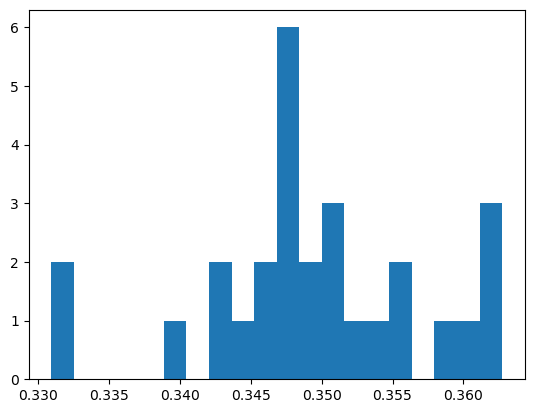

weighted stddev of ratios: 0.34795741217197323 
simple stddev of ratios: 0.00781901060136355

Starting simulation for isotope   >>> Br <<<   ...
     editing input file ...
Br in CH4 - pure methane


02c0:err:environ:init_peb starting L"Z:\\Users\\brigitte\\SRIM\\TRIM.exe" in experimental wow64 mode
02c0:fixme:ole:OaBuildVersion Version value not known yet. Please investigate it !
02c0:fixme:olepicture:OLEPictureImpl_SaveAsFile (00B92FA0)->(013B2118, 0, 00000000), hacked stub.
02c0:fixme:imm:ImeSetActiveContext (0020018E, 1): stub
02c0:fixme:imm:ImmReleaseContext (001F01DE, 0020018E): stub
02c0:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
02c0:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
02c0:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
02c0:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
02c0:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
02c


Starting simulation for isotope   >>> Kr <<<   ...
     editing input file ...
Kr in CH4 - pure methane


02d0:err:environ:init_peb starting L"Z:\\Users\\brigitte\\SRIM\\TRIM.exe" in experimental wow64 mode
02d0:fixme:ole:OaBuildVersion Version value not known yet. Please investigate it !
02d0:fixme:olepicture:OLEPictureImpl_SaveAsFile (00B92FA0)->(013B2118, 0, 00000000), hacked stub.
02d0:fixme:imm:ImeSetActiveContext (002001B0, 1): stub
02d0:fixme:imm:ImmReleaseContext (00270090, 002001B0): stub
02d0:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
02d0:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
02d0:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
02d0:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
02d0:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
02d


Starting simulation for isotope   >>> Rb <<<   ...
     editing input file ...
Rb in CH4 - pure methane


02e0:err:environ:init_peb starting L"Z:\\Users\\brigitte\\SRIM\\TRIM.exe" in experimental wow64 mode
02e0:fixme:ole:OaBuildVersion Version value not known yet. Please investigate it !
02e0:fixme:olepicture:OLEPictureImpl_SaveAsFile (00B92FA0)->(013B2118, 0, 00000000), hacked stub.
02e0:fixme:imm:ImeSetActiveContext (002101BA, 1): stub
02e0:fixme:imm:ImmReleaseContext (0023009A, 002101BA): stub
02e0:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
02e0:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
02e0:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
02e0:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
02e0:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
02e


Starting simulation for isotope   >>> Sr <<<   ...
     editing input file ...
Sr in CH4 - pure methane


02f0:err:environ:init_peb starting L"Z:\\Users\\brigitte\\SRIM\\TRIM.exe" in experimental wow64 mode
02f0:fixme:ole:OaBuildVersion Version value not known yet. Please investigate it !
02f0:fixme:olepicture:OLEPictureImpl_SaveAsFile (00B92FA0)->(013B2118, 0, 00000000), hacked stub.
02f0:fixme:imm:ImeSetActiveContext (002001B2, 1): stub
02f0:fixme:imm:ImmReleaseContext (00200082, 002001B2): stub
02f0:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
02f0:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
02f0:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
02f0:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
02f0:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
02f


Starting simulation for isotope   >>> Y <<<   ...
     editing input file ...
Y in CH4 - pure methane


0300:err:environ:init_peb starting L"Z:\\Users\\brigitte\\SRIM\\TRIM.exe" in experimental wow64 mode
0300:fixme:ole:OaBuildVersion Version value not known yet. Please investigate it !
0300:fixme:olepicture:OLEPictureImpl_SaveAsFile (00B92FA0)->(013B2118, 0, 00000000), hacked stub.
0300:fixme:imm:ImeSetActiveContext (002101B2, 1): stub
0300:fixme:imm:ImmReleaseContext (002E00EA, 002101B2): stub
0300:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0300:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0300:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0300:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0300:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
030


Starting simulation for isotope   >>> Zr <<<   ...
     editing input file ...
Zr in CH4 - pure methane


0310:err:environ:init_peb starting L"Z:\\Users\\brigitte\\SRIM\\TRIM.exe" in experimental wow64 mode
0310:fixme:ole:OaBuildVersion Version value not known yet. Please investigate it !
0310:fixme:olepicture:OLEPictureImpl_SaveAsFile (00B92FA0)->(013B2118, 0, 00000000), hacked stub.
0310:fixme:imm:ImeSetActiveContext (002201B2, 1): stub
0310:fixme:imm:ImmReleaseContext (002501CE, 002201B2): stub
0310:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0310:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0310:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0310:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0310:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
031


Starting simulation for isotope   >>> Nb <<<   ...
     editing input file ...
Nb in CH4 - pure methane


0320:err:environ:init_peb starting L"Z:\\Users\\brigitte\\SRIM\\TRIM.exe" in experimental wow64 mode
0320:fixme:ole:OaBuildVersion Version value not known yet. Please investigate it !
0320:fixme:olepicture:OLEPictureImpl_SaveAsFile (00B92FA0)->(013B2118, 0, 00000000), hacked stub.
0320:fixme:imm:ImeSetActiveContext (002501D4, 1): stub
0320:fixme:imm:ImmReleaseContext (002B0198, 002501D4): stub
0320:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0320:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0320:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0320:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0320:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
032


Starting simulation for isotope   >>> Mo <<<   ...
     editing input file ...
Mo in CH4 - pure methane


0330:err:environ:init_peb starting L"Z:\\Users\\brigitte\\SRIM\\TRIM.exe" in experimental wow64 mode
0330:fixme:ole:OaBuildVersion Version value not known yet. Please investigate it !
0330:fixme:olepicture:OLEPictureImpl_SaveAsFile (00B92FA0)->(013B2118, 0, 00000000), hacked stub.
0330:fixme:imm:ImeSetActiveContext (002501D2, 1): stub
0330:fixme:imm:ImmReleaseContext (0026005A, 002501D2): stub
0330:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0330:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0330:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0330:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0330:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
033


Starting simulation for isotope   >>> Tc <<<   ...
     editing input file ...
Tc in CH4 - pure methane


0340:err:environ:init_peb starting L"Z:\\Users\\brigitte\\SRIM\\TRIM.exe" in experimental wow64 mode
0340:fixme:ole:OaBuildVersion Version value not known yet. Please investigate it !
0340:fixme:olepicture:OLEPictureImpl_SaveAsFile (00B92FA0)->(013B2118, 0, 00000000), hacked stub.
0340:fixme:imm:ImeSetActiveContext (002601D2, 1): stub
0340:fixme:imm:ImmReleaseContext (00390090, 002601D2): stub
0340:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0340:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0340:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0340:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0340:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
034


Starting simulation for isotope   >>> Ru <<<   ...
     editing input file ...
Ru in CH4 - pure methane


0350:err:environ:init_peb starting L"Z:\\Users\\brigitte\\SRIM\\TRIM.exe" in experimental wow64 mode
0350:fixme:ole:OaBuildVersion Version value not known yet. Please investigate it !
0350:fixme:olepicture:OLEPictureImpl_SaveAsFile (00B92FA0)->(013B2118, 0, 00000000), hacked stub.
0350:fixme:imm:ImeSetActiveContext (003201CE, 1): stub
0350:fixme:imm:ImmReleaseContext (004900BE, 003201CE): stub
0350:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0350:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0350:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0350:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0350:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
035


Starting simulation for isotope   >>> Rh <<<   ...
     editing input file ...
Rh in CH4 - pure methane


0360:err:environ:init_peb starting L"Z:\\Users\\brigitte\\SRIM\\TRIM.exe" in experimental wow64 mode
0360:fixme:ole:OaBuildVersion Version value not known yet. Please investigate it !
0360:fixme:olepicture:OLEPictureImpl_SaveAsFile (00B92FA0)->(013B2118, 0, 00000000), hacked stub.
0360:fixme:imm:ImeSetActiveContext (002901C8, 1): stub
0360:fixme:imm:ImmReleaseContext (002A0098, 002901C8): stub
0360:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0360:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0360:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0360:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0360:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
036


Starting simulation for isotope   >>> Pd <<<   ...
     editing input file ...
Pd in CH4 - pure methane


0370:err:environ:init_peb starting L"Z:\\Users\\brigitte\\SRIM\\TRIM.exe" in experimental wow64 mode
0370:fixme:ole:OaBuildVersion Version value not known yet. Please investigate it !
0370:fixme:olepicture:OLEPictureImpl_SaveAsFile (00B92FA0)->(013B2118, 0, 00000000), hacked stub.
0370:fixme:imm:ImeSetActiveContext (002B01BE, 1): stub
0370:fixme:imm:ImmReleaseContext (002C01B0, 002B01BE): stub
0370:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0370:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0370:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0370:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0370:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
037


Starting simulation for isotope   >>> Ag <<<   ...
     editing input file ...
Ag in CH4 - pure methane


0380:err:environ:init_peb starting L"Z:\\Users\\brigitte\\SRIM\\TRIM.exe" in experimental wow64 mode
0380:fixme:ole:OaBuildVersion Version value not known yet. Please investigate it !
0380:fixme:olepicture:OLEPictureImpl_SaveAsFile (00B92FA0)->(013B2118, 0, 00000000), hacked stub.
0380:fixme:imm:ImeSetActiveContext (002C01BE, 1): stub
0380:fixme:imm:ImmReleaseContext (002B00A6, 002C01BE): stub
0380:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0380:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0380:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0380:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0380:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
038


Starting simulation for isotope   >>> Cd <<<   ...
     editing input file ...
Cd in CH4 - pure methane


0390:err:environ:init_peb starting L"Z:\\Users\\brigitte\\SRIM\\TRIM.exe" in experimental wow64 mode
0390:fixme:ole:OaBuildVersion Version value not known yet. Please investigate it !
0390:fixme:olepicture:OLEPictureImpl_SaveAsFile (00B92FA0)->(013B2118, 0, 00000000), hacked stub.
0390:fixme:imm:ImeSetActiveContext (002D01BE, 1): stub
0390:fixme:imm:ImmReleaseContext (003601CE, 002D01BE): stub
0390:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0390:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0390:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0390:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0390:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
039


Starting simulation for isotope   >>> Sn <<<   ...
     editing input file ...
Sn in CH4 - pure methane


03a0:err:environ:init_peb starting L"Z:\\Users\\brigitte\\SRIM\\TRIM.exe" in experimental wow64 mode
03a0:fixme:ole:OaBuildVersion Version value not known yet. Please investigate it !
03a0:fixme:olepicture:OLEPictureImpl_SaveAsFile (00B92FA0)->(013B2118, 0, 00000000), hacked stub.
03a0:fixme:imm:ImeSetActiveContext (002E01BE, 1): stub
03a0:fixme:imm:ImmReleaseContext (002D01C8, 002E01BE): stub
03a0:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
03a0:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
03a0:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
03a0:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
03a0:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
03a


Starting simulation for isotope   >>> Sb <<<   ...
     editing input file ...
Sb in CH4 - pure methane


03b0:err:environ:init_peb starting L"Z:\\Users\\brigitte\\SRIM\\TRIM.exe" in experimental wow64 mode
03b0:fixme:ole:OaBuildVersion Version value not known yet. Please investigate it !
03b0:fixme:olepicture:OLEPictureImpl_SaveAsFile (00B92FA0)->(013B2118, 0, 00000000), hacked stub.
03b0:fixme:imm:ImeSetActiveContext (002C01B8, 1): stub
03b0:fixme:imm:ImmReleaseContext (004101E0, 002C01B8): stub
03b0:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
03b0:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
03b0:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
03b0:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
03b0:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
03b


Starting simulation for isotope   >>> Te <<<   ...
     editing input file ...
Te in CH4 - pure methane


03c0:err:environ:init_peb starting L"Z:\\Users\\brigitte\\SRIM\\TRIM.exe" in experimental wow64 mode
03c0:fixme:ole:OaBuildVersion Version value not known yet. Please investigate it !
03c0:fixme:olepicture:OLEPictureImpl_SaveAsFile (00B92FA0)->(013B2118, 0, 00000000), hacked stub.
03c0:fixme:imm:ImeSetActiveContext (002D01B8, 1): stub
03c0:fixme:imm:ImmReleaseContext (002E00FA, 002D01B8): stub
03c0:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
03c0:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
03c0:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
03c0:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
03c0:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
03c


Starting simulation for isotope   >>> I <<<   ...
     editing input file ...
I in CH4 - pure methane


03d0:err:environ:init_peb starting L"Z:\\Users\\brigitte\\SRIM\\TRIM.exe" in experimental wow64 mode
03d0:fixme:ole:OaBuildVersion Version value not known yet. Please investigate it !
03d0:fixme:olepicture:OLEPictureImpl_SaveAsFile (00B92FA0)->(013B2118, 0, 00000000), hacked stub.
03d0:fixme:imm:ImeSetActiveContext (002E01B8, 1): stub
03d0:fixme:imm:ImmReleaseContext (0039008A, 002E01B8): stub
03d0:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
03d0:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
03d0:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
03d0:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
03d0:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
03d


Starting simulation for isotope   >>> Xe <<<   ...
     editing input file ...
Xe in CH4 - pure methane


03e0:err:environ:init_peb starting L"Z:\\Users\\brigitte\\SRIM\\TRIM.exe" in experimental wow64 mode
03e0:fixme:ole:OaBuildVersion Version value not known yet. Please investigate it !
03e0:fixme:olepicture:OLEPictureImpl_SaveAsFile (00B92FA0)->(013B2118, 0, 00000000), hacked stub.
03e0:fixme:imm:ImeSetActiveContext (003C01B0, 1): stub
03e0:fixme:imm:ImmReleaseContext (003201BE, 003C01B0): stub
03e0:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
03e0:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
03e0:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
03e0:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
03e0:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
03e


Starting simulation for isotope   >>> Cs <<<   ...
     editing input file ...
Cs in CH4 - pure methane


03f0:err:environ:init_peb starting L"Z:\\Users\\brigitte\\SRIM\\TRIM.exe" in experimental wow64 mode
03f0:fixme:ole:OaBuildVersion Version value not known yet. Please investigate it !
03f0:fixme:olepicture:OLEPictureImpl_SaveAsFile (00B92FA0)->(013B2118, 0, 00000000), hacked stub.
03f0:fixme:imm:ImeSetActiveContext (003001C2, 1): stub
03f0:fixme:imm:ImmReleaseContext (004500D6, 003001C2): stub
03f0:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
03f0:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
03f0:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
03f0:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
03f0:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
03f


Starting simulation for isotope   >>> Ba <<<   ...
     editing input file ...
Ba in CH4 - pure methane


0400:err:environ:init_peb starting L"Z:\\Users\\brigitte\\SRIM\\TRIM.exe" in experimental wow64 mode
0400:fixme:ole:OaBuildVersion Version value not known yet. Please investigate it !
0400:fixme:olepicture:OLEPictureImpl_SaveAsFile (00B92FA0)->(013B2118, 0, 00000000), hacked stub.
0400:fixme:imm:ImeSetActiveContext (003101C2, 1): stub
0400:fixme:imm:ImmReleaseContext (00400098, 003101C2): stub
0400:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0400:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0400:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0400:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0400:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
040


Starting simulation for isotope   >>> La <<<   ...
     editing input file ...
La in CH4 - pure methane


0410:err:environ:init_peb starting L"Z:\\Users\\brigitte\\SRIM\\TRIM.exe" in experimental wow64 mode
0410:fixme:ole:OaBuildVersion Version value not known yet. Please investigate it !
0410:fixme:olepicture:OLEPictureImpl_SaveAsFile (00B92FA0)->(013B2118, 0, 00000000), hacked stub.
0410:fixme:imm:ImeSetActiveContext (003201C2, 1): stub
0410:fixme:imm:ImmReleaseContext (003601A8, 003201C2): stub
0410:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0410:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0410:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0410:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0410:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
041


Starting simulation for isotope   >>> Ce <<<   ...
     editing input file ...
Ce in CH4 - pure methane


0420:err:environ:init_peb starting L"Z:\\Users\\brigitte\\SRIM\\TRIM.exe" in experimental wow64 mode
0420:fixme:ole:OaBuildVersion Version value not known yet. Please investigate it !
0420:fixme:olepicture:OLEPictureImpl_SaveAsFile (00B92FA0)->(013B2118, 0, 00000000), hacked stub.
0420:fixme:imm:ImeSetActiveContext (003F01BE, 1): stub
0420:fixme:imm:ImmReleaseContext (003801AE, 003F01BE): stub
0420:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0420:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0420:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0420:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0420:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
042


Starting simulation for isotope   >>> Pr <<<   ...
     editing input file ...
Pr in CH4 - pure methane


0430:err:environ:init_peb starting L"Z:\\Users\\brigitte\\SRIM\\TRIM.exe" in experimental wow64 mode
0430:fixme:ole:OaBuildVersion Version value not known yet. Please investigate it !
0430:fixme:olepicture:OLEPictureImpl_SaveAsFile (00B92FA0)->(013B2118, 0, 00000000), hacked stub.
0430:fixme:imm:ImeSetActiveContext (004001BE, 1): stub
0430:fixme:imm:ImmReleaseContext (003600CA, 004001BE): stub
0430:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0430:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0430:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0430:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0430:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
043


Starting simulation for isotope   >>> Nd <<<   ...
     editing input file ...
Nd in CH4 - pure methane


0440:err:environ:init_peb starting L"Z:\\Users\\brigitte\\SRIM\\TRIM.exe" in experimental wow64 mode
0440:fixme:ole:OaBuildVersion Version value not known yet. Please investigate it !
0440:fixme:olepicture:OLEPictureImpl_SaveAsFile (00B92FA0)->(013B2118, 0, 00000000), hacked stub.
0440:fixme:imm:ImeSetActiveContext (004101BE, 1): stub
0440:fixme:imm:ImmReleaseContext (004301B0, 004101BE): stub
0440:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0440:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0440:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0440:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0440:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
044


Starting simulation for isotope   >>> Pm <<<   ...
     editing input file ...
Pm in CH4 - pure methane


0450:err:environ:init_peb starting L"Z:\\Users\\brigitte\\SRIM\\TRIM.exe" in experimental wow64 mode
0450:fixme:ole:OaBuildVersion Version value not known yet. Please investigate it !
0450:fixme:olepicture:OLEPictureImpl_SaveAsFile (00B92FA0)->(013B2118, 0, 00000000), hacked stub.
0450:fixme:imm:ImeSetActiveContext (003801B4, 1): stub
0450:fixme:imm:ImmReleaseContext (003B01AE, 003801B4): stub
0450:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0450:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0450:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0450:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0450:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
045


Starting simulation for isotope   >>> Sm <<<   ...
     editing input file ...
Sm in CH4 - pure methane


0460:err:environ:init_peb starting L"Z:\\Users\\brigitte\\SRIM\\TRIM.exe" in experimental wow64 mode
0460:fixme:ole:OaBuildVersion Version value not known yet. Please investigate it !
0460:fixme:olepicture:OLEPictureImpl_SaveAsFile (00B92FA0)->(013B2118, 0, 00000000), hacked stub.
0460:fixme:imm:ImeSetActiveContext (003901B4, 1): stub
0460:fixme:imm:ImmReleaseContext (004800F2, 003901B4): stub
0460:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0460:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0460:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0460:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0460:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
046


Starting simulation for isotope   >>> Eu <<<   ...
     editing input file ...
Eu in CH4 - pure methane


0470:err:environ:init_peb starting L"Z:\\Users\\brigitte\\SRIM\\TRIM.exe" in experimental wow64 mode
0470:fixme:ole:OaBuildVersion Version value not known yet. Please investigate it !
0470:fixme:olepicture:OLEPictureImpl_SaveAsFile (00B92FA0)->(013B2118, 0, 00000000), hacked stub.
0470:fixme:imm:ImeSetActiveContext (003901D2, 1): stub
0470:fixme:imm:ImmReleaseContext (003200F4, 003901D2): stub
0470:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0470:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0470:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0470:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
0470:fixme:olepicture:OLEPictureImpl_FindConnectionPoint no connection point for {33ad4ed2-6699-11cf-b70c-00aa0060d393}
047

   done
Simulation complete


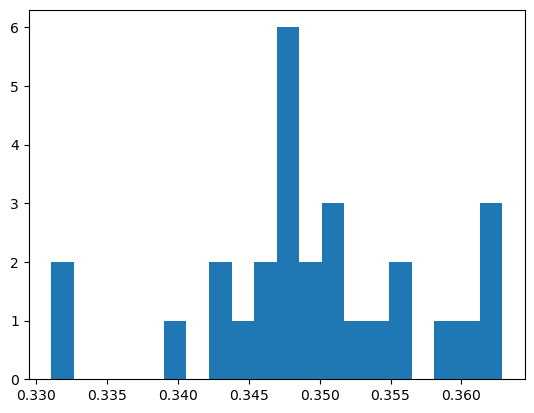

weighted stddev of ratios: 0.3481022768551708 
simple stddev of ratios: 0.007813021728880695


In [10]:
reload(simulation_lib); from simulation_lib import *  
reload(aux_functions); from aux_functions import *

#gas_density and ugas_density defined previously
gas_density_list = [gas_density-ugas_density, gas_density+ugas_density]

print(gas_density_list)

results = []

for gas_density in gas_density_list:

    urCG, uaverage_range, uXRratio = start_simulation_uncertainty(srim_path, input_list_path, gas_density, layer_width=layer_width)

    uXRratio = np.array(uXRratio)
    plt.hist(uXRratio, bins=20)
    plt.show()

    results.append(["density g/cm3: ",gas_density,"sum(uXRratio*yield_list/2)", sum(uXRratio*yield_list/2),"np.std(uXRratio)", np.std(uXRratio)])
    print("weighted stddev of ratios:" ,sum(uXRratio*yield_list/2),"\nsimple stddev of ratios:", np.std(uXRratio))



In [20]:
reload(simulation_lib); from simulation_lib import *  
reload(aux_functions); from aux_functions import *

results1 = results[0]
results2 = results[-1]

print(results1)
print(results2)

uratio1 = results1[-3]; std_uratio1 = results1[-1]
uratio2 = results2[-3]; std_uratio2 = results2[-1]

stddevratios_rho = np.std([uratio1,uratio2,np.sum(XRratio*yield_list/2)])
meanratios = np.mean([uratio1,uratio2,np.sum(XRratio*yield_list/2)])
stddevsimu = (np.std(XRratio*yield_list/2))

final_ratio_uncertainty = np.sqrt( (np.std(XRratio*yield_list/2))**2 + stddevratios_rho**2)# np.mean(XRratio*yield_list/2)*np.sqrt((stddevratios/meanratios)**2 + stddevsimu)
print("Ratio uncertainty:\n   ", final_ratio_uncertainty, "\nstddev rho:" , stddevratios_rho, "   stddev simu: ", stddevsimu)


print("Final result: \n     %.3f ± %.3f" %(np.sum(XRratio*yield_list/2), final_ratio_uncertainty))

['density g/cm3: ', 0.0007210000000000001, 'sum(uXRratio*yield_list/2)', 0.34795741217197323, 'np.std(uXRratio)', 0.00781901060136355]
['density g/cm3: ', 0.000737, 'sum(uXRratio*yield_list/2)', 0.3481022768551708, 'np.std(uXRratio)', 0.007813021728880695]
Ratio uncertainty:
    0.008905953052640768 
stddev rho: 0.0014707632461557357    stddev simu:  0.008783669805360333
Final result: 
     0.351 ± 0.009
